In [ ]:
# Data loading

from sklearn.datasets import load_wine

dataset = load_wine()
data = dataset.data
labels = dataset.target

print(data)
print(labels)
print(data.shape)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
(178, 13)


In [ ]:
# Split data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.3) 
print(len(x_train), len(x_test), type(x_train))

print(x_test)
print(y_test)

124 54 <class 'numpy.ndarray'>
[[1.351000e+01 1.800000e+00 2.650000e+00 1.900000e+01 1.100000e+02
  2.350000e+00 2.530000e+00 2.900000e-01 1.540000e+00 4.200000e+00
  1.100000e+00 2.870000e+00 1.095000e+03]
 [1.237000e+01 1.130000e+00 2.160000e+00 1.900000e+01 8.700000e+01
  3.500000e+00 3.100000e+00 1.900000e-01 1.870000e+00 4.450000e+00
  1.220000e+00 2.870000e+00 4.200000e+02]
 [1.281000e+01 2.310000e+00 2.400000e+00 2.400000e+01 9.800000e+01
  1.150000e+00 1.090000e+00 2.700000e-01 8.300000e-01 5.700000e+00
  6.600000e-01 1.360000e+00 5.600000e+02]
 [1.284000e+01 2.960000e+00 2.610000e+00 2.400000e+01 1.010000e+02
  2.320000e+00 6.000000e-01 5.300000e-01 8.100000e-01 4.920000e+00
  8.900000e-01 2.150000e+00 5.900000e+02]
 [1.103000e+01 1.510000e+00 2.200000e+00 2.150000e+01 8.500000e+01
  2.460000e+00 2.170000e+00 5.200000e-01 2.010000e+00 1.900000e+00
  1.710000e+00 2.870000e+00 4.070000e+02]
 [1.413000e+01 4.100000e+00 2.740000e+00 2.450000e+01 9.600000e+01
  2.050000e+00 7.60000

In [ ]:
# Convert to tensor

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset


x_train = torch.from_numpy(x_train).float()
y_train = torch.from_numpy(y_train).long()

x_test = torch.from_numpy(x_test).float()
y_test = torch.from_numpy(y_test).long()
print(type(x_train))

<class 'torch.Tensor'>


In [ ]:
# Generating dataset

train_set = TensorDataset(x_train, y_train)
test_set = TensorDataset(x_test, y_test)



"""
문제 1 : train_loader 생성 ( 5점 )

조건 1 : train_set 변수 활용
조건 2 : 배치 크기는 16
조건 3 : shuffle 사용
"""
### 코드 작성 위치
trainloader = torch.utils.data.DataLoader(train_set, batch_size=16,
                                          shuffle=True, num_workers=2)

In [ ]:
# Construct model

#문제 2 :  간단한 Linear 모델 구성 ( 7점 )

#조건 1 : 총 Layer 수는 6개이며, 입력부터 Feature 사이즈 진행은 다음과 같다.
 #       ( 입력 -> 256 -> 128 -> 64 -> 32 -> 16 -> 3)
#조건 2 : Layer1,2,3 직후에는 Batch Normalization 층이 존재한다.
#조건 3 : 활성함수는 ReLU를 사용한다.
#조건 4 : 멤버변수에 Softmax를 선언한다.


class Model(nn.Module):
  def __init__(self):
    super().__init__()
    ### 코드 작성 위치
    self.fc1 = nn.Linear(13, 256)
    self.fc2 = nn.Linear(256, 128)
    self.fc3 = nn.Linear(128, 64)
    self.fc4 = nn.Linear(64, 32)
    self.fc5 = nn.Linear(32, 16)
    self.fc6 = nn.Linear(16, 3)

    self.bnm1 = nn.BatchNorm1d(256)
    self.bnm2 = nn.BatchNorm1d(128)
    self.bnm3 = nn.BatchNorm1d(64)

    self.relu = torch.nn.ReLU()

    self.soft = nn.Softmax(dim=1)

  def forward(self,x):

#문제 3 : Linear 모델 forward 함수 작성 ( 7점 )

#조건 1 : 기본 순서는 다음과 같다.
#         ( Linear 층 - Batch Normalization - Activation )
#조건 2 : 마지막 Linear 후에는 Activation을 사용하지 않고, 문제 2에서 멤버변수로 선언한 Softmax 를 사용한다.

    ### 코드 작성 위치
    x = self.relu(self.bnm1(self.fc1(x)))
    x = self.relu(self.bnm2(self.fc2(x)))
    x = self.relu(self.bnm3(self.fc3(x)))

    x = self.relu(self.fc4(x))
    x = self.relu(self.fc5(x))
    x = self.soft(self.fc6(x))
    
    return x

model = Model()
print(model)


Model(
  (fc1): Linear(in_features=13, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=32, bias=True)
  (fc5): Linear(in_features=32, out_features=16, bias=True)
  (fc6): Linear(in_features=16, out_features=3, bias=True)
  (bnm1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bnm2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bnm3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU()
  (soft): Softmax(dim=1)
)


In [ ]:
input = torch.randn(16, 13)
out = model(input)
print(out)

tensor([[0.3044, 0.3760, 0.3196],
        [0.3244, 0.3608, 0.3148],
        [0.3299, 0.3654, 0.3046],
        [0.3243, 0.3541, 0.3216],
        [0.3302, 0.3665, 0.3033],
        [0.3291, 0.3528, 0.3181],
        [0.3319, 0.3622, 0.3060],
        [0.3263, 0.3728, 0.3009],
        [0.3365, 0.3573, 0.3062],
        [0.3159, 0.3644, 0.3197],
        [0.3351, 0.3620, 0.3029],
        [0.3241, 0.3711, 0.3048],
        [0.3194, 0.3651, 0.3155],
        [0.3154, 0.3737, 0.3109],
        [0.3262, 0.3528, 0.3209],
        [0.3321, 0.3681, 0.2998]], grad_fn=<SoftmaxBackward>)


In [ ]:
# Configure optimizer

import torch.optim as optim

#문제 4 : Optimizer 생성 (5점)
 #조건 1 : SGD 생성
 #조건 2 : 학습률 0.001
 #조건 3 : Momentum 0.9

### 코드 작성 위치
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

#문제 5 : 손실 함수 생성 (5점 )
 #조건 1 : Cross Entropy Loss 생성

### 코드 작성 위치
criterion = nn.CrossEntropyLoss()

In [ ]:
# Training

epochs = 200
losses = list()
accuracies = list()

for epoch in range(epochs):
  epoch_loss = 0  
  epoch_accuracy = 0


  for x, y in trainloader:

 # 문제 6 : Training code 작성 ( 6점 )

 # 조건 1 : 튜토리얼에서 학습했던 내용과 같이 학습 코드 작성

    ### 코드 작성 위치
    optimizer.zero_grad()

    output = model(x)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()


    _, predicted = torch.max(output, dim=1)
    accuracy = (predicted == y).sum().item()
    epoch_loss += loss.item()
    epoch_accuracy += accuracy
  

  epoch_loss /= len(trainloader)
  epoch_accuracy /= len(x_train)
  print("epoch :{}, \tloss :{}, \taccuracy :{}".format(str(epoch+1).zfill(3),round(epoch_loss,4), round(epoch_accuracy,4)))
  
  losses.append(epoch_loss)
  accuracies.append(epoch_accuracy)

  

epoch :001, 	loss :1.0909, 	accuracy :0.4113
epoch :002, 	loss :1.0895, 	accuracy :0.4355
epoch :003, 	loss :1.0876, 	accuracy :0.4355
epoch :004, 	loss :1.0852, 	accuracy :0.4839
epoch :005, 	loss :1.0848, 	accuracy :0.4839
epoch :006, 	loss :1.0822, 	accuracy :0.5081
epoch :007, 	loss :1.0811, 	accuracy :0.5484
epoch :008, 	loss :1.0796, 	accuracy :0.5484
epoch :009, 	loss :1.0786, 	accuracy :0.5484
epoch :010, 	loss :1.0782, 	accuracy :0.5726
epoch :011, 	loss :1.0766, 	accuracy :0.5484
epoch :012, 	loss :1.0754, 	accuracy :0.5726
epoch :013, 	loss :1.0746, 	accuracy :0.5806
epoch :014, 	loss :1.0738, 	accuracy :0.5645
epoch :015, 	loss :1.0716, 	accuracy :0.5806
epoch :016, 	loss :1.0705, 	accuracy :0.5968
epoch :017, 	loss :1.0681, 	accuracy :0.6371
epoch :018, 	loss :1.0688, 	accuracy :0.6048
epoch :019, 	loss :1.0665, 	accuracy :0.629
epoch :020, 	loss :1.0651, 	accuracy :0.621
epoch :021, 	loss :1.0632, 	accuracy :0.629
epoch :022, 	loss :1.0618, 	accuracy :0.6452
epoch :023, 	

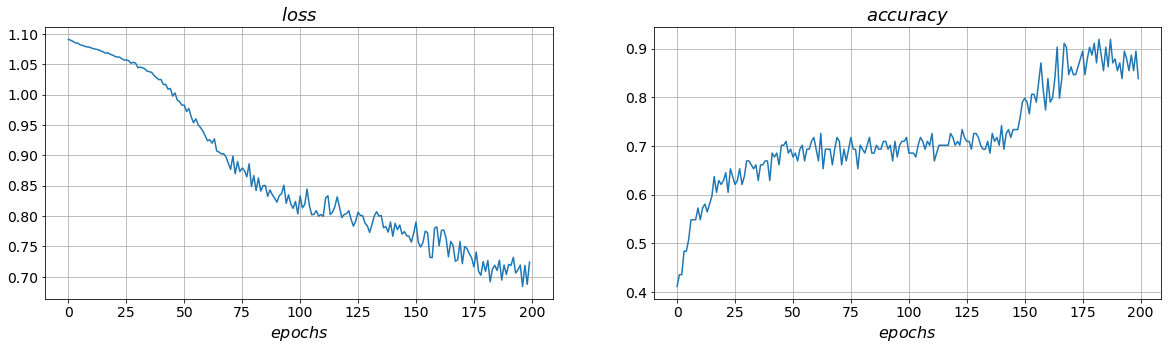

In [ ]:
# Plot result

import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
plt.subplots_adjust(wspace=0.2)

plt.subplot(1,2,1)
plt.title("$loss$",fontsize = 18)
plt.plot(losses)
plt.grid()
plt.xlabel("$epochs$", fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)


plt.subplot(1,2,2)
plt.title("$accuracy$", fontsize = 18)
plt.plot(accuracies)
plt.grid()
plt.xlabel("$epochs$", fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.show()

In [ ]:
# Test

output = model(x_test)
_, predicted = torch.max(output, dim=1)
accuracy = round((predicted == y_test).sum().item() / len(y_test),4)


print("test_set accuracy :", round(accuracy,4))

test_set accuracy : 0.8148
